In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [3]:
from pandas import DataFrame 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties 

font = FontProperties(fname="/home/gezi/soft/simsunttc/msyh.ttf", size=12)  #size可不用指定

In [4]:
from IPython.display import Image

In [5]:
import gezi
from libgezi import utf82gbk, gbk2utf8

In [6]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS
 
flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/lijiaoshou/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic.5neg/epoch/', '')
flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic.5neg/epoch/model.cpkt-50-63750', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.bak/epoch/model.cpkt-10-12750', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model.v0/bow.basic/', '')

#flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/keyword/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/keyword/model/rnn.lijiaoshou2/', '')

flags.DEFINE_string('seg_method_', 'basic', '')
flags.DEFINE_bool('feed_single_', True, '')

import gezi
import melt 
from deepiu.util import text2ids

import numpy as np

text2ids.init(FLAGS.vocab)

predictor = melt.Predictor(FLAGS.model_dir)

def predict(text, text2=None, topn=0):
  text = utf82gbk(text)
  timer = gezi.Timer()
  text_ids = text2ids.text2ids(text, FLAGS.seg_method_, feed_single=FLAGS.feed_single_, max_words=50)
  #print('text_ids', text_ids)
  
  if topn:
    #print(tf.get_default_graph().get_all_collection_keys())
    vocab = text2ids.vocab
    scores = predictor.inference('text_words_score', feed_dict = {'bow/main/text:0': [text_ids]})
    #print(scores)
    scores = scores[0]
    indexes = (-scores).argsort()[:topn]
    print(' '.join(['%s:%.6f'%(gbk2utf8(vocab.key(index)), scores[index]) for index in indexes]))
    return
    
  if text2 is not None:
    text2 = utf82gbk(text2)
    text2_ids = text2ids.text2ids(text2, FLAGS.seg_method_, feed_single=True)
    score = predictor.inference(['textsim'], 
                                    feed_dict= {
                                      'bow/main/text:0': [text_ids],
                                      'bow/main/text2:0': [text2_ids]
                                      })
    print(score[0][0])
    return score[0][0]

  #print('words', words)
  argmax_encode = predictor.inference(['words_importance'], 
                                    feed_dict= {
                                      'bow/main/text:0': [text_ids]
                                      })
  print('argmax_encode', argmax_encode[0])

  argmax_encode = argmax_encode[0][0]
  argmax_encode = [max(x, 0) for x in argmax_encode]

  text_ids =  text2ids.text2ids(text, FLAGS.seg_method_, feed_single=FLAGS.feed_single_, append_start=False, append_end=False)
  words = text2ids.ids2words(text_ids)
    
  words = [gbk2utf8(x) for x in words]

  seq_len = 0
  for x in words:
  	if x != 0:
  		seq_len += 1
  	else:
  		break

  print(text_ids)

   # visualize model
  import matplotlib.pyplot as plt
  #argmaxs = [np.sum((argmax_encode==k)) for k in range(seq_len)]
  argmaxs = argmax_encode[:seq_len]
  print('argmaxs', argmaxs, np.sum(argmaxs), seq_len)
  x = range(len(argmaxs))
  total = sum([x for x in argmaxs if x > 0])
  y = [100.0*n/total for n in argmaxs]
  #print(words, y)
  print(gbk2utf8(text))
  
  #for word, score in zip(words, y):
  #  print(word, score)
  
  fig = plt.figure()
  
  #words = [x.decode('utf8') for x in words]
  #words = [i for i in range(len(words))]

  #plt.xticks(x, words, rotation=45)
  #plt.bar(x, y)
  #plt.ylabel('%')
  #plt.title('Visualisation of words importance')

  df = DataFrame({"%":y}, index=words) 
  ax = df.plot(kind = 'bar', rot = 90) 
  labels = [label.decode("utf-8") for label in df.index.values] 
  ax.set_xticklabels(labels, fontproperties=font) 
    
  #zhfont1 = matplotlib.font_manager.FontProperties(fname='/home/gezi/soft/simsunttc/msyh.ttf')
  #plt.xlabel('性别',fontproperties=zhfont1)
  #plt.ylabel('人数',fontproperties=zhfont1)
  #plt.xticks( (0,1),('男','女') ,fontproperties=zhfont1)
  #plt.bar(left=(0,1), height=(1,0.5), width=0.35)
  
  plt.title('Visualisation of words importance')
  #plt.title('句子词汇重要度')
  plt.show()

tensorflow_version: 1.2.0-rc0
ENCODE_UNK 1
restore from /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic.5neg/epoch/model.cpkt-50-63750


INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic.5neg/epoch/model.cpkt-50-63750


import graph ok /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic.5neg/epoch/model.cpkt-50-63750.meta
restore ok /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic.5neg/epoch/model.cpkt-50-63750


In [7]:
def top_words(text, topn=100):
  return predict(text, topn=topn)

In [8]:
top_words('高铁')
top_words('美女')

铁:0.879220 高:0.409862 温婉:0.325993 古色:0.324220 诚鑫:0.308926 猪:0.305746 中水:0.303755 绝望:0.301810 养猪:0.301689 牧业:0.298850 卡顿:0.296854 换热:0.296624 浑噩:0.287285 傍:0.285523 腐朽:0.285511 楼盖:0.284738 成活:0.284508 隔离:0.283209 切割:0.282517 猪舍:0.280492 母猪:0.279607 总社:0.279603 斜:0.275695 鸿源:0.275087 猪苗:0.274914 据悉:0.274903 公墓:0.273955 威力:0.273908 砌筑:0.272577 海鹏:0.269888 咋办:0.269032 大可:0.268461 至爱:0.266916 便:0.265437 爱与诚:0.264546 变幻:0.264349 案例:0.264196 冶:0.263961 三五:0.263911 联大:0.263538 虚弱:0.263306 过关:0.262299 犒:0.260702 羊:0.260615 斤:0.260438 勃:0.259150 水木:0.258902 祥云:0.258578 喷漆:0.257964 桂花:0.257335 效应:0.256458 栅:0.256377 紫穗:0.256062 粗暴:0.255764 血泪:0.255226 披风:0.254730 和谐:0.254556 川菜:0.254461 蛋挞:0.254239 分拣:0.254036 云霞:0.254002 浇:0.253608 倒角:0.253396 粗壮:0.252544 雪域:0.252120 凹陷:0.251889 锤头:0.251551 科:0.251536 相处:0.250077 四柱:0.249775 城西:0.249303 牌坊:0.249294 理解:0.249210 菜单:0.248965 假证:0.248822 能量:0.248530 十几:0.248115 迪泰:0.247635 亮相:0.247036 222:0.247016 开端:0.246822 航拍:0.246799 外面:0.246663 胎教:0.246537 创维:0

In [9]:
top_words('墨镜')

墨镜:1.000000 偏光:0.545692 眼镜:0.493054 镜框:0.436369 古风:0.406325 太忙:0.390763 一两百:0.386115 家乡:0.382426 副:0.356573 血统:0.335594 镜架:0.330471 敦煌:0.330206 久经:0.326818 滑:0.324630 镜:0.322893 全身:0.321487 碧仁:0.320052 羟丙:0.317380 爱好:0.309784 地域:0.309116 名气:0.300919 喵喵:0.299883 芦:0.299735 加剧:0.298385 重演:0.295260 获利:0.293459 兵:0.290940 粉条:0.289760 直减:0.289436 袋鼠:0.289082 烽:0.288852 饮品:0.288629 舱:0.288373 色母:0.286936 繁育:0.285141 目:0.284640 甲基:0.283294 利弊:0.283093 voc:0.281887 恋情:0.281479 嘉峪:0.279822 华盛顿:0.279166 新贵:0.278589 以免:0.277786 朋:0.277361 科隆:0.276624 迪士尼:0.276495 棒球:0.276240 新山:0.275023 倍儿:0.274555 足银:0.274426 求真:0.272833 母粒:0.272269 花都:0.272091 催乳:0.271994 喷油:0.270594 降温:0.269819 合叶:0.269457 钢圈:0.269284 仅剩:0.268808 288:0.268687 碳酸铜:0.267715 石英:0.267192 活儿:0.267014 着手:0.266813 兵器:0.266411 都灵:0.265984 好滋味:0.265786 组成:0.265281 际:0.265166 膨胀:0.265118 女包:0.264966 忻:0.264343 血亏:0.264137 易学:0.264020 色调:0.262674 瑞鑫:0.262630 听话:0.261956 校车:0.261593 水产:0.261468 贵华:0.260540 襄:0.260275 °:0.259485 纶:0.259336

In [10]:
predict('美女', '美女')
predict('帅哥戴墨镜', '帅哥')
predict('帅哥戴墨镜', '墨镜')

[ 1.00000024]
[ 0.44547498]
[ 0.42074725]


array([ 0.42074725], dtype=float32)

argmax_encode [[ 1.00000024  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.        ]]
[1311, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [1.0000002] 1.0 1
美女


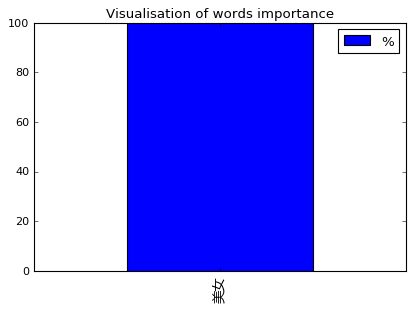

argmax_encode [[ 0.44547495  0.72851622  0.42074719  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.        ]]
[6829, 1355, 12429, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.44547495, 0.72851622, 0.42074719] 1.59474 3
帅哥戴墨镜


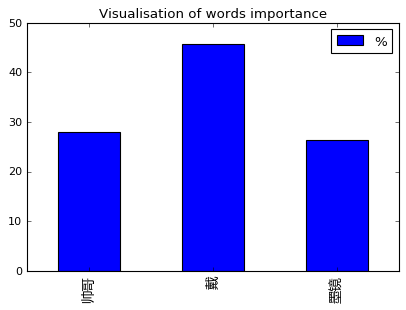

argmax_encode [[ 0.22148897  0.37621814  0.02041648  0.10934834  0.21251303  0.2017663
   0.12982325  0.06563825  0.1312239   0.12982325  0.24360727  0.09350042
   0.12982325  0.12227838  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[3935, 640, 5, 80, 1321, 508, 3, 34, 269, 3, 2239, 25, 3, 1407, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.22148897, 0.37621814, 0.02041648, 0.10934834, 0.21251303, 0.2017663, 0.12982325, 0.065638252, 0.1312239, 0.12982325, 0.24360727, 0.09350042, 0.12982325, 0.12227838] 2.18747 14
初中孩子的免费精品课，用手机，在家上，省心


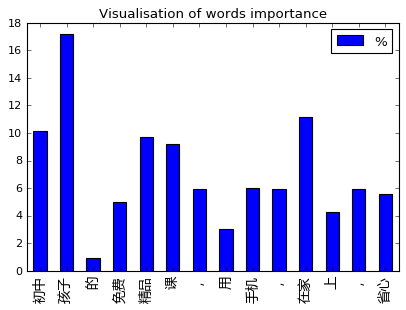

argmax_encode [[ 0.06269579  0.111773    0.2225972   0.16781309  0.1525387   0.28630173
   0.00296708  0.18175104  0.04712195  0.18746938  0.34896466  0.09352542
   0.2233631   0.28630173  0.21911909  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[17, 34, 1393, 324, 29, 199, 41, 7663, 3, 993, 269, 712, 56, 199, 1362, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.062695786, 0.111773, 0.2225972, 0.16781309, 0.1525387, 0.28630173, 0.0029670838, 0.18175104, 0.047121949, 0.18746938, 0.34896466, 0.093525425, 0.2233631, 0.28630173, 0.21911909] 2.5943 15
好用颜值高才是王道，这些手机现在买才实惠


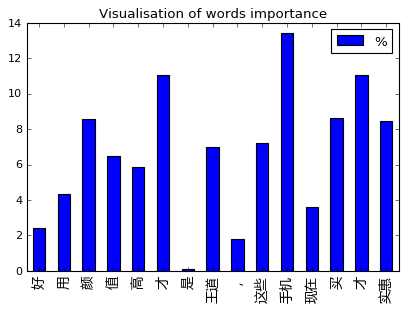

In [11]:
predict('美女')
predict('帅哥戴墨镜')
predict('初中孩子的免费精品课，用手机，在家上，省心')
predict('好用颜值高才是王道，这些手机现在买才实惠')

argmax_encode [[ 0.08056982  0.23012066  0.20307112  0.24321203  0.03898719  0.25251287
  -0.0300747   0.08150366  0.1394431   0.1405102   0.20993701  0.11541978
   0.17658883  0.05346333  0.16330186  0.08226275  0.28010231  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[243, 350, 116, 1598, 135, 1401, 6, 18, 1208, 200, 878, 402, 365, 43, 579, 46, 428, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.080569819, 0.23012066, 0.20307112, 0.24321203, 0.03898719, 0.25251287, 0, 0.081503659, 0.1394431, 0.1405102, 0.20993701, 0.11541978, 0.17658883, 0.053463332, 0.16330186, 0.082262747, 0.28010231] 2.49100650847 17
比信

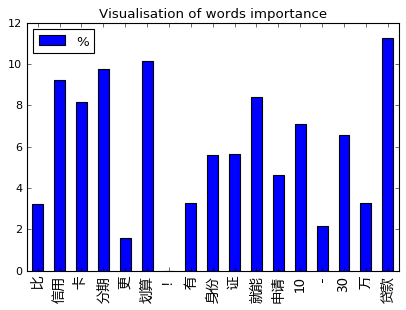

argmax_encode [[ 0.3021661   0.12693317  0.23317266  0.4063426   0.26907742  0.02031403
   0.23961428  0.13697766  0.26602444  0.08783605  0.0392533   0.11529621
   0.26115924  0.06970239  0.25843745  0.11987992  0.09250971  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[4, 16, 4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.3021661, 0.12693317, 0.23317266, 0.4063426, 0.26907742, 0.020314027, 0.23961428, 0.13697766, 0.26602444, 0.087836049, 0.039253302, 0.11529621, 0.26115924, 0.069702387, 0.25843745, 0.11987992, 0.092509709] 3.0447 17
1890元

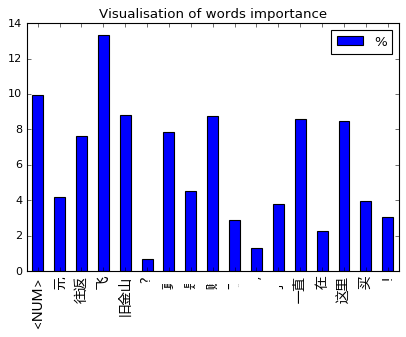

argmax_encode [[ 0.07418215  0.05399986  0.05751804  0.19441225  0.24478543  0.21234444
   0.55109984 -0.02675616  0.21257687  0.30495432  0.27152815  0.03003877
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[14, 199, 41, 976, 620, 100, 844, 5, 3709, 4480, 2260, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.074182153, 0.053999856, 0.057518039, 0.19441225, 0.24478543, 0.21234444, 0.55109984, 0, 0.21257687, 0.30495432, 0.27152815, 0.030038767] 2.20744010434 12
这才是上班族修本科的正确打开方式！


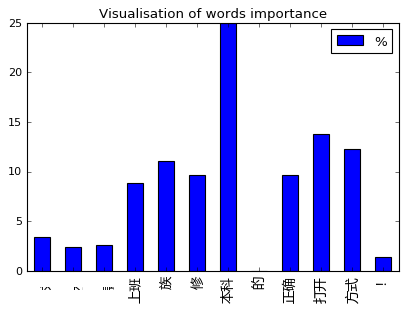

In [12]:
predict('比信用卡分期更划算！有身份证就能申请10-30万贷款')
predict('1890元往返飞旧金山?真是赚了,我一直在这里买!')
predict('这才是上班族修本科的正确打开方式！')

argmax_encode [[ 0.09981035  0.15875724  0.16849138  0.14527065  0.09348147  0.36650747
   0.42757511  0.11995997 -0.11158291  0.10474619  0.41719177  0.28622577
   0.06398254  0.20204166  0.20463011  0.134113    0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[19589, 36, 737, 8, 74, 626, 852, 245, 7, 993, 5404, 340, 12, 9771, 12322, 6140, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.099810347, 0.15875724, 0.16849138, 0.14527065, 0.093481474, 0.36650747, 0.42757511, 0.11995997, 0, 0.10474619, 0.41719177, 0.28622577, 0.063982539, 0.20204166, 0.20463011, 0.134113] 2.99278467149 16
国庆到成都不要住酒店啦,这些民

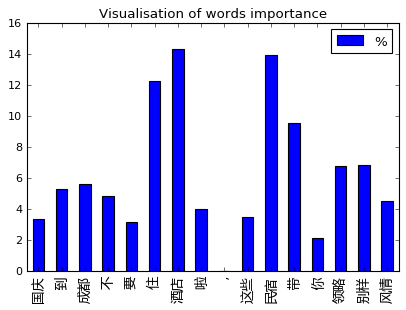

argmax_encode [[ 0.47141021  0.12272939  0.15436549  0.05496561  0.12038452  0.2517224
   0.47141021  0.27061623  0.37528324  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[8145, 39, 269, 133, 8, 256, 8145, 33, 478, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.47141021, 0.12272939, 0.15436549, 0.054965608, 0.12038452, 0.2517224, 0.47141021, 0.27061623, 0.37528324] 2.29289 9
低头玩手机?不如低头学英语


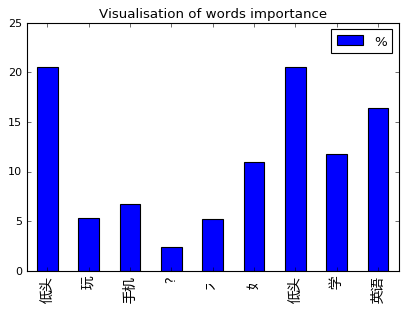

argmax_encode [[ 0.09186195  0.10375525  0.20180959  0.40690953  0.00575888  0.00361286
   0.03297707  0.33633217  0.0616754   0.14384878  0.18978046  0.18501049
   0.10375525  0.0312371   0.24446878  0.02297715  0.05719056  0.03339472
   0.11029603  0.13046536  0.14982517  0.1348494   0.14384878  0.07297454
   0.14685461  0.04119966  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]]
[6829, 6, 1277, 2671, 15, 59, 341, 2532, 87, 18, 400, 529, 6, 49, 378, 78, 58, 172, 21, 3697, 5718, 542, 18, 1262, 2511, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.091861948, 0.10375525, 0.20180959, 0.40690953, 0.0057588811, 0.003612861, 0.032977071, 0.33633217, 0.061675403, 0.14384878, 0.18978046, 0.18501049, 0.10375525, 0.031237103, 0.24446878,

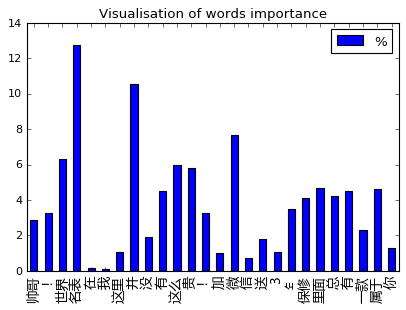

argmax_encode [[ 0.16260792  0.49338856  0.14342296  0.10376935  0.14342296  0.54354405
   0.07547943  0.06530402  0.35897428  0.02048512 -0.01787054  0.36132884
  -0.05560562  0.07076434  0.1253107   0.54354405 -0.03738487  0.13363302
   0.16131063  0.21873087  0.35897428  0.00218578  0.03818046  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[2520, 1741, 11, 218, 11, 478, 2583, 885, 508, 7, 136, 640, 3755, 279, 25, 478, 20, 4884, 16, 1777, 508, 80, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.16260792, 0.49338856, 0.14342296, 0.10376935, 0.14342296, 0.54354405, 0.075479433, 0.065304019, 0.35897428, 0.020485116, 0, 0.36132884, 0, 0.07076434, 0.1253107, 0.54354405, 0, 0.13363302, 0.161

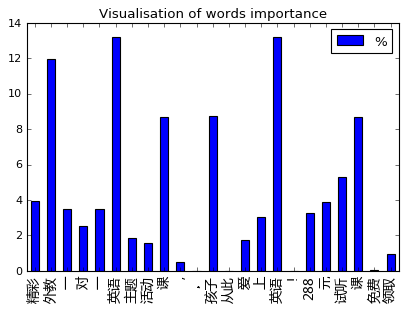

In [13]:
predict('国庆到成都不要住酒店啦,这些民宿带你领略别样风情')
predict('低头玩手机?不如低头学英语')
predict('帅哥！世界名表在我这里并没有这么贵！加微信送3年保修里面总有一款属于你')
predict('精彩外教一对一英语主题活动课,让孩子从此爱上英语!288元试听课免费领取')

argmax_encode [[ 0.24687275  0.30556265  0.25593433  0.05953737  0.11638254  0.05689681
   0.25593433  0.49744689  0.07167367  0.10668674  0.07628776  0.17667229
   0.08910425  0.14272326  0.02564378  0.08098501  0.20107919  0.10644466
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[2280, 4880, 33, 90, 1294, 133, 33, 2193, 328, 942, 7, 612, 36, 163, 27, 8, 978, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.24687275, 0.30556265, 0.25593433, 0.059537366, 0.11638254, 0.056896806, 0.25593433, 0.49744689, 0.071673669, 0.10668674, 0.076287761, 0.17667229, 0.08910425, 0.14272326, 0.025643785, 0.08098501, 0.20107919, 0.

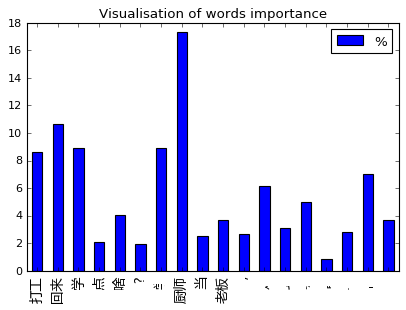

argmax_encode [[ 0.40403849  0.20323743  0.11200369  0.19410083  0.09704483  0.52841043
   0.11200369  0.25713226  0.1400463   0.15936366  0.04112649  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.40403849, 0.20323743, 0.11200369, 0.19410083, 0.097044833, 0.52841043, 0.11200369, 0.25713226, 0.1400463, 0.15936366, 0.041126486] 2.24851 11
水饺加盟,无需厨师,总部扶持创业!


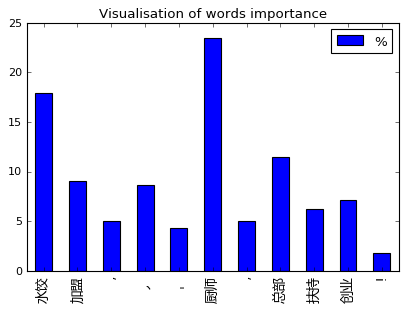

argmax_encode [[ 0.41492331  0.22687687  0.10868243  0.20309412  0.10243255  0.53300416
   0.10868243  0.26861769  0.16538034  0.1860968   0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.41492331, 0.22687687, 0.10868243, 0.20309412, 0.10243255, 0.53300416, 0.10868243, 0.26861769, 0.16538034, 0.1860968] 2.31779 10
水饺加盟,无需厨师,总部扶持创业


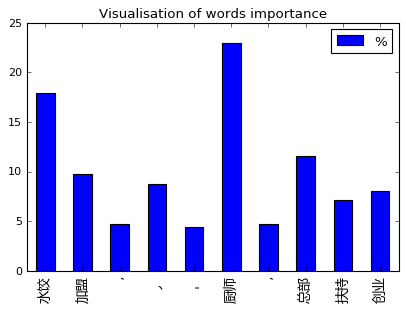

In [14]:
predict('打工回来学点啥?学厨师当老板,走到哪都不怕！')
predict('水饺加盟,无需厨师,总部扶持创业!')
predict('水饺加盟,无需厨师,总部扶持创业')

argmax_encode [[ 0.43640655  0.30288324  0.3738451   0.13216119  0.20027159  0.32029042
   0.07805072  0.1720145   0.12747964  0.15020257  0.422849    0.01780764
  -0.04693946  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[1434, 4062, 1992, 303, 29, 695, 115, 52, 676, 38, 1386, 9, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.43640655, 0.30288324, 0.3738451, 0.13216119, 0.20027159, 0.32029042, 0.078050718, 0.1720145, 0.12747964, 0.15020257, 0.422849, 0.017807644, 0] 2.73426216468 13
iPhone隐藏功能：高铁也能在线选座了！


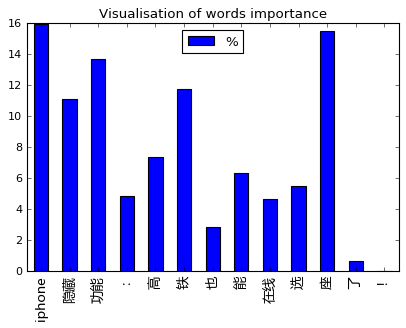

In [15]:
predict('iPhone隐藏功能：高铁也能在线选座了！')

In [16]:
predict('iPhone隐藏功能：高铁也能在线选座了！', 'iPhone')

[ 0.43640658]


array([ 0.43640658], dtype=float32)

In [17]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁')

[ 0.36725962]


array([ 0.36725962], dtype=float32)

In [18]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '选座')

[ 0.44867551]


array([ 0.44867551], dtype=float32)

In [19]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁选座')

[ 0.55473971]


array([ 0.55473971], dtype=float32)

argmax_encode [[ 0.26546115  0.26728779  0.09967306  0.57314014  0.17720015  0.05779415
   0.10482384  0.0814122   0.01913678  0.30775642  0.05779415  0.12165364
   0.11818263  0.19343027  0.02208729  0.57314014  0.27205575  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[4447, 7542, 9634, 2835, 8124, 7, 9771, 3086, 5, 3612, 7, 136, 7808, 3254, 25, 2835, 5341, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.26546115, 0.26728779, 0.099673055, 0.57314014, 0.17720015, 0.057794146, 0.10482384, 0.081412196, 0.019136783, 0.30775642, 0.057794146, 0.12165364, 0.11818263, 0.19343027, 0.022087295, 0.57314014, 0.27205575]

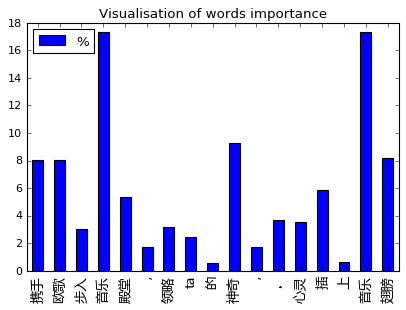

In [20]:
predict('携手欧歌步入音乐殿堂,领略ta的神奇,让心灵插上音乐翅膀')

argmax_encode [[ 0.32582057  0.79130608  0.27445531  0.21080571  0.26573724  0.21227495
  -0.00355878  0.14372993  0.00634185  0.14372993  0.79130608  0.21227495
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[8854, 2277, 583, 3581, 852, 197, 7, 11, 218, 11, 2277, 197, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.32582057, 0.79130608, 0.27445531, 0.21080571, 0.26573724, 0.21227495, 0, 0.14372993, 0.0063418485, 0.14372993, 0.79130608, 0.21227495] 3.37778258696 12
巨人游泳五星级酒店培训,一对一游泳培训


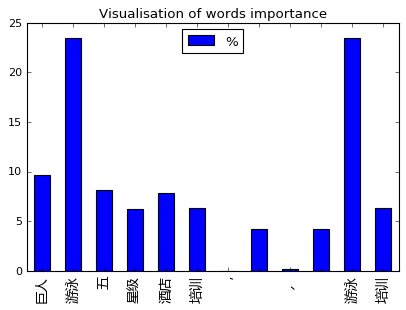

In [21]:
predict('巨人游泳五星级酒店培训,一对一游泳培训')

argmax_encode [[ 0.24199603  0.41886139  0.27215928  0.00212604  0.22010225  0.15336037
   0.27526957  0.1052306   0.00133767  0.10359693  0.30781323  0.0971366
   0.2724933   0.14055534  0.0983832   0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.24199603, 0.41886139, 0.27215928, 0.0021260381, 0.22010225, 0.15336037, 0.27526957, 0.1052306, 0.0013376735, 0.10359693, 0.30781323, 0.097136602, 0.2724933, 0.14055534, 0.098383203] 2.71042 15
往返飞旧金山?真是赚了,我一直在这里买!


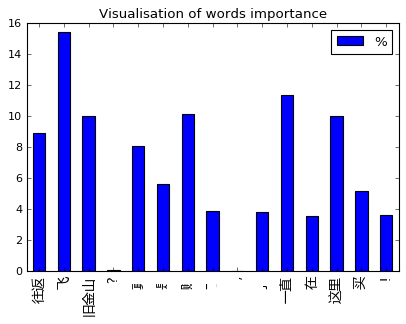

In [22]:
predict('往返飞旧金山?真是赚了,我一直在这里买!')

argmax_encode [[ 0.11576355  0.13823405  0.53240287  0.56255066 -0.01789094  0.19058596
   0.03541267  0.5700739   0.13416171  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[8, 74, 626, 852, 3, 341, 5, 5404, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.11576355, 0.13823405, 0.53240287, 0.56255066, 0, 0.19058596, 0.035412665, 0.5700739, 0.13416171] 2.27918536589 9
不要住酒店，这里的民宿好


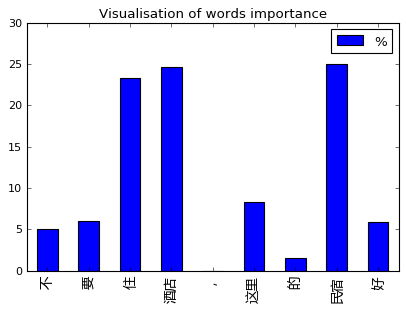

In [23]:
predict('不要住酒店，这里的民宿好')

argmax_encode [[ 0.11576356  0.13823405  0.53240287  0.57007396 -0.01789089  0.19058597
   0.03541266  0.56255066  0.1341617   0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[8, 74, 626, 5404, 3, 341, 5, 852, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.11576356, 0.13823405, 0.53240287, 0.57007396, 0, 0.19058597, 0.035412662, 0.56255066, 0.1341617] 2.27918543667 9
不要住民宿，这里的酒店好


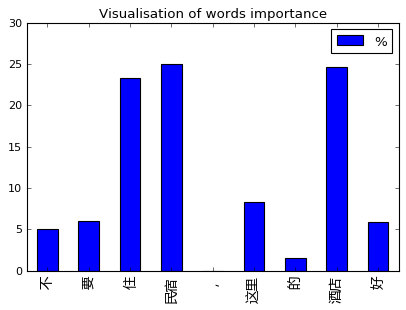

In [24]:
predict('不要住民宿，这里的酒店好')

argmax_encode [[ 0.25043094  0.02837554  0.42078114  0.32451671  0.32971811  0.11902227
   0.1388348   0.1222544   0.20431149  0.10599982  0.15871352  0.11902227
   0.28393969  0.08799553  0.04785024  0.21198253  0.23269761  0.10599982
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[247, 189, 4845, 2881, 12429, 3, 417, 52, 175, 9, 401, 3, 1072, 174, 23, 6114, 556, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.25043094, 0.028375544, 0.42078114, 0.32451671, 0.32971811, 0.11902227, 0.1388348, 0.1222544, 0.20431149, 0.10599982, 0.15871352, 0.11902227, 0.28393969, 0.087995529, 0.04785024, 0.21198253, 0.23269761, 0.10

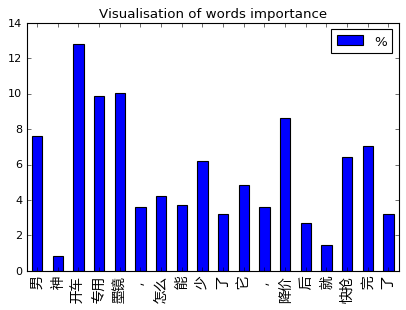

In [25]:
predict('男神开车专用墨镜，怎么能少了它，降价后就快抢完了')

argmax_encode [[-0.03998984  0.16948318  0.15764549  0.30590639  0.24076734  0.15462852
   0.18059392  0.08630162  0.1070136   0.29557875  0.21780124  0.16948318
   0.25575298  0.15721951  0.18488011  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[59, 5, 22092, 5705, 3781, 914, 326, 7, 38, 1262, 1553, 5, 12429, 343, 1826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0, 0.16948318, 0.15764549, 0.30590639, 0.24076734, 0.15462852, 0.18059392, 0.086301625, 0.1070136, 0.29557875, 0.21780124, 0.16948318, 0.25575298, 0.15721951, 0.18488011] 2.68305584788 15
我的家乡惠州越来越热,选一款喜欢的墨镜很重要


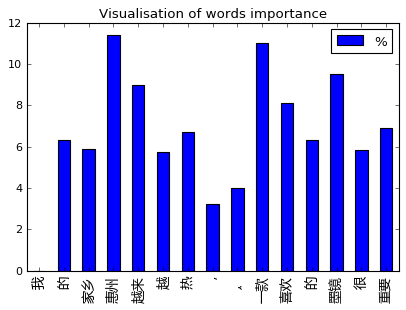

In [26]:
predict('我的家乡惠州越来越热,选一款喜欢的墨镜很重要')

In [27]:
predict('选一款喜欢的墨镜很重要,我的家乡惠州越来越热', '我的家乡惠州越来越热')

[ 0.59184337]


array([ 0.59184337], dtype=float32)

In [28]:
predict('选一款喜欢的墨镜很重要,我的家乡惠州越来越热', '选一款喜欢的墨镜很重要')

[ 0.65455914]


array([ 0.65455914], dtype=float32)

In [29]:
predict('我的家乡惠州越来越热,选一款喜欢的墨镜很重要', '选一款喜欢的墨镜很重要')

[ 0.65455914]


array([ 0.65455914], dtype=float32)

In [30]:
top_words('往返')

往返:1.000000 外汇:0.363085 196:0.358258 新加坡:0.346838 金城:0.345874 山水:0.324130 魔法:0.322892 细数:0.319840 2216:0.315908 票价:0.311400 查查:0.310415 商丘:0.307013 航线:0.306209 鲨:0.303538 高尚:0.302299 拉伸:0.301477 招行:0.299420 110:0.298018 常开:0.297176 俄语:0.295655 旅游:0.294889 利得:0.293842 二合一:0.293361 找乐:0.293251 创立:0.291213 惯:0.291176 西藏:0.290352 膳:0.290243 竞猜:0.289488 锂:0.289035 必须:0.288885 磁材:0.288833 1350:0.288712 警官:0.288422 te:0.287686 欧美:0.287413 英雄:0.286096 预:0.286024 沙画:0.285038 相册:0.283461 岸:0.283339 大地:0.283003 买马:0.282217 960:0.281936 渠:0.280353 异国:0.279790 骇浪:0.279339 偌大:0.278436 招兵:0.278381 秀美:0.278289 弓:0.278165 把手:0.278090 kid:0.277640 终:0.274692 塞浦路斯:0.272489 插排:0.272262 艉:0.271876 景苑:0.271725 繁华:0.271386 惹:0.271172 考验:0.270513 难找:0.270242 午夜:0.270181 房山:0.270112 体会:0.269739 敬:0.268682 食宿:0.268425 龙脉:0.268294 寨:0.268134 欧巴:0.267816 时钟:0.267484 亲爱:0.266525 出游:0.266457 诉:0.266412 jp762a:0.265886 吹膜:0.265092 居留:0.264133 拯救:0.263447 橙色:0.263396 温泉:0.263209 穿越:0.263078 辑:0.263056 出发:0.262809 严:0

In [31]:
top_words('民宿')

民宿:1.000000 roy:0.406352 altea:0.405133 客房:0.400371 雅庭:0.375116 义务:0.372694 蚊虫:0.362797 菠萝格:0.361464 艳遇:0.360002 公寓:0.359138 神魂:0.357731 冰晶:0.357619 城内:0.357034 选房:0.356737 学力:0.353868 她来:0.349855 三十一:0.347295 臣:0.339207 屹立:0.338076 静安:0.331441 精装:0.328323 江湾:0.327807 新颜:0.326298 咏春:0.326108 傻瓜:0.324448 嘉峪:0.324373 含:0.324034 山顶:0.321469 重装:0.318255 蓝宝:0.317904 贝拉:0.317658 客栈:0.316746 驴友:0.316411 出名:0.315815 俐:0.314423 东鹏:0.314406 如来:0.314146 汇思:0.313794 醒:0.313660 住在:0.311519 初稿:0.310622 牵制:0.309499 转弯:0.309368 阴凉:0.309105 回春:0.307177 装出:0.306961 墓地:0.306335 用地:0.305395 避暑:0.304662 王朝:0.304614 黑马:0.302653 西昌:0.302611 吃好:0.302239 画笔:0.300282 印尼:0.300139 畔:0.298842 旅行:0.298299 承保:0.297891 奈何:0.296853 豫龙:0.295877 邯郸:0.295476 绿城:0.293094 雅丽:0.292855 一房:0.292156 沙滩:0.291750 公大:0.290024 售房:0.288492 墓园:0.288370 画质:0.288360 小镇:0.288067 鬼屋:0.285329 笑话:0.284464 耶:0.284377 皇家:0.284102 狩猎:0.284099 箔:0.283665 烈士:0.283535 旭阳:0.283488 顺达:0.282085 佐敦:0.282043 免交:0.282026 产生:0.281873 打捞:0.280990 阿马丁:0

In [32]:
top_words('酒店')

酒店:1.000000 宾馆:0.360833 佐敦:0.352380 展台:0.339268 舒达:0.337005 重听:0.335464 歌声:0.323881 影吧:0.314179 订房:0.294442 瞰:0.292164 020:0.289196 软膜:0.289104 张掖:0.287599 中教:0.287285 吃好:0.280971 水床:0.280001 自力:0.279525 紧邻:0.278636 齐聚:0.276777 破浪:0.276589 大城:0.273939 始:0.272138 客房:0.269859 迪拜:0.267530 会场:0.266220 选拔:0.265046 同里:0.264577 中亚:0.261919 来今:0.260991 238:0.260907 易观:0.258832 香河:0.257618 艳遇:0.257489 苏杭:0.255002 货架:0.254731 墙面:0.254296 售房:0.254161 南洋:0.254137 五绝:0.253823 躲:0.252858 三家:0.252290 贵族:0.252125 旷世:0.251846 家鱼:0.251402 桑拿:0.251343 弈:0.250875 喷粉:0.250453 以假:0.250221 柏金:0.249581 广大:0.249281 见报:0.248643 灯光:0.248135 和美:0.247937 筑造:0.247744 软包:0.247445 咏春:0.246273 叫号:0.245947 足浴:0.245923 天花板:0.245879 汗蒸:0.245774 粮库:0.245645 倒:0.245583 展柜:0.245239 蒸:0.244883 百合:0.244753 联展:0.243135 捆扎:0.242912 辨别:0.242911 格调:0.242887 宣告:0.242087 通力:0.242002 判别:0.241993 休闲:0.241954 改善:0.241879 香醇:0.241554 益丰:0.240967 灞河:0.240833 俐:0.240672 大豪:0.240141 dts:0.239980 流出:0.239801 支援:0.238697 中琦:0.238170 使:0.237

In [33]:
top_words('旧金山')

旧金山:1.000000 情迷:0.519809 me:0.417107 部曲:0.373311 采暖:0.371947 排放:0.371132 mvr:0.367938 立柱:0.363945 清真:0.363316 面漆:0.362235 2888:0.359919 荣誉:0.356323 加州:0.353439 快运:0.350557 博通:0.350150 愧对:0.345888 夜景:0.344502 环游:0.344481 沿线:0.344296 海运:0.340676 商行:0.340188 华星:0.338852 通路:0.336650 邮电:0.333323 泰和:0.333299 浇筑:0.331521 halal:0.331166 房山:0.330693 爵士:0.330415 鹰:0.330157 黄岛:0.329262 明智:0.329078 定购:0.328174 洛杉矶:0.328081 等候:0.326743 多分:0.325158 楼板:0.325050 猫网:0.321991 下图:0.321692 票价:0.320989 重型:0.320756 1700:0.320358 瑙:0.318824 雄峰:0.318694 讲解:0.318621 丙烯酸:0.317050 主笔:0.315243 亚运:0.313463 臻品:0.311788 改建:0.310419 楼:0.310307 就此:0.309694 创联:0.309580 古城:0.307769 废纸:0.307579 蓝卡:0.307297 市政:0.305917 汉白玉:0.304716 完毕:0.304679 海龟:0.304181 马来西亚:0.304129 拌:0.304011 宏亚:0.303836 直呼:0.303405 多难:0.303145 颜:0.302892 编写:0.302788 亮剑:0.302538 全线:0.302338 福州:0.301760 浓浓:0.301464 元都:0.301037 燊:0.300811 气:0.298776 机长:0.298204 挑灯:0.295757 成真:0.295490 灯具:0.295024 亚东:0.294789 优于:0.294375 61:0.294119 罗德:0.293910 来美:0.2921

In [34]:
top_words('我的家乡惠州越来越热,选一款喜欢的墨镜很重要')

惠州:0.305906 一款:0.295579 墨镜:0.255753 越来:0.240767 轻盈:0.239881 阶段:0.236849 太平洋:0.225680 喜欢:0.217801 奥达:0.217174 瑞普:0.216629 可取:0.216511 排毒:0.212857 天成:0.211332 椅子:0.204900 馍:0.203230 金久卓尔:0.200521 拉带:0.198871 凿井:0.196607 牧草:0.195861 甲基:0.195304 焖饭:0.193597 烩:0.190973 擀:0.187832 活期:0.187478 同城:0.187302 稀缺:0.186343 凶:0.185568 眼镜:0.185284 重要:0.184880 偏光:0.184276 药材:0.183381 辣妹:0.181245 热:0.180594 排气:0.179826 吸收:0.178046 特氟龙:0.177354 今秋:0.176542 财宝:0.176277 小鸟:0.173548 主轴:0.173438 腰:0.172948 20000:0.172457 大概:0.172161 把子:0.172155 肚子:0.170368 school:0.170246 何以:0.169622 噪音:0.169592 的:0.169483 抽象:0.168706 磁芯:0.168624 榨:0.168595 尾货:0.168560 1c:0.168251 肉:0.167901 米修:0.167621 茵:0.167248 限量:0.167226 十三:0.166489 海源:0.166439 库伯:0.166175 超能:0.166021 此刻:0.165784 代码:0.164813 优厚:0.164594 帖:0.164493 金利源:0.163811 火烧:0.163393 科隆:0.163162 名就:0.162672 烘培:0.162359 政法:0.162287 堂堂:0.162239 返:0.162045 赛季:0.161616 人气:0.160874 奶牛:0.160867 推荐:0.160749 剂:0.160173 饭锅:0.160098 惊叹:0.159967 小众:0.159571 吊带:0.158878 朴树:0.

In [35]:
top_words('眼镜')

眼镜:1.000000 墨镜:0.493054 偏光:0.414446 滑:0.405336 镜框:0.379496 镜片:0.369346 视力:0.362258 镜架:0.340521 脱贫:0.339586 古风:0.325037 足金:0.321063 整形:0.299340 近视:0.298882 地域:0.295838 锌:0.295289 稿:0.294524 8m:0.293686 卜:0.291015 方面:0.289607 卤水:0.286584 co:0.286468 白白:0.285609 绝活:0.285475 话说:0.283766 白兰地:0.281881 因:0.281640 回调:0.280573 嗖:0.279706 打死:0.279667 猴:0.274416 挤:0.274189 熟练:0.273668 舱:0.273236 人们:0.271286 附赠:0.271153 侠客:0.271015 找准:0.270994 便捷:0.268817 部分:0.267655 288:0.266820 育婴:0.266803 恒通:0.266737 f1:0.265763 分级:0.264790 经理:0.264712 苦命:0.262776 副:0.261943 井中:0.261267 国色:0.260656 宽:0.259293 困扰:0.259208 逸:0.259207 免受:0.256213 重疾:0.254964 爱贝:0.254879 多色:0.254604 满额:0.253848 拖:0.253799 留神:0.252750 暑假:0.251668 兰:0.251182 酒仙:0.250685 保住:0.250079 意中:0.249375 新动态:0.248283 手袋:0.246019 虹桥:0.245903 病虫:0.245880 二十二:0.245726 乐乐:0.245580 959:0.243146 银通:0.243085 捷径:0.241743 手术:0.239915 耳机:0.239862 八字:0.239794 寓意:0.239235 位列:0.238812 获利:0.237705 白骨精:0.237424 追寻:0.236473 直邮:0.235867 够用:0.235621 喷枪:0.235514 

In [36]:
top_words('nike')

nike:1.000000 迈内孔:0.329533 科泰:0.302593 天空:0.301284 边疆:0.300325 长短:0.296872 吉祥:0.295886 下降:0.295087 hro:0.287263 先进:0.283749 海特:0.283096 塑造:0.281785 暇:0.278679 假如:0.276729 缺陷:0.274461 璐:0.270351 候车:0.266639 长期:0.266599 竞赛:0.265035 谴:0.263776 日前:0.261621 河源:0.261387 翘首:0.259735 贴牌:0.259407 徽州:0.257885 ysl:0.257097 猪血:0.255696 长龙:0.255608 金凯博:0.255263 铎:0.254252 矿山:0.253355 电阻:0.253285 州:0.253150 预埋件:0.253021 松原:0.252923 斛:0.252716 怦然:0.252311 弧:0.251991 易车:0.251596 巷:0.251568 buy:0.250406 足联:0.249928 便民:0.249715 围棋:0.248275 宏亚:0.248028 49800:0.247941 只是:0.247304 祁:0.246869 骷髅:0.246856 暗黑:0.246748 每场:0.246697 石子:0.246386 打假:0.246308 麦:0.245951 美尼:0.245113 恒峰:0.244970 担当:0.244518 井:0.244372 金铸:0.244081 畏:0.243017 中顺:0.242884 陶粒:0.242416 冮:0.242245 毛孔:0.241946 一百:0.241564 亮眼:0.241528 中世纪:0.241404 汽油:0.241198 名扬:0.240628 球拍:0.240382 鳞片:0.240348 两重:0.239891 丙:0.239274 嘉兴:0.239269 窗饰:0.238984 腋毛:0.238359 大侠:0.236973 武大:0.236827 挂靠:0.236552 掏:0.236250 大白:0.236152 农民:0.235997 腿毛:0.235403 昨晚:0.23

In [37]:
top_words('耐克')

耐克:1.000000 跑鞋:0.440428 福泰欣:0.407379 鞋子:0.382939 世贸:0.368139 鞋:0.359887 靠手:0.357785 论文:0.351907 祼:0.349808 亲笔:0.344688 马赛克:0.341667 开箱:0.336305 穿出:0.333483 发票:0.333414 细微:0.329822 自攻:0.328710 318:0.327204 母爱:0.325644 华赛:0.324556 春茶:0.323305 龙船:0.321502 羟:0.320793 特辑:0.317452 悉尼:0.315421 翻山:0.314302 鹏辉:0.314264 签名:0.314008 黄牛:0.313024 配色:0.311749 穿:0.310178 孜:0.308658 油价:0.305467 伢:0.305400 注资:0.304896 雅力达:0.304385 2433:0.303482 长江:0.303341 腔:0.302359 板鞋:0.302296 翅:0.301158 优美:0.300834 仓库:0.300575 仁杰:0.299876 幅:0.299527 唐山人:0.299338 美加金联:0.298372 菁:0.297883 极光:0.297692 扮靓:0.297167 杉:0.297110 印章:0.296217 何方:0.295901 惊奇:0.294627 二十二:0.293778 士达:0.293330 疾病:0.292971 阿迪:0.292169 财大:0.292101 鳄鱼:0.290979 魅:0.290974 扯开:0.290675 笃:0.290447 手感:0.290381 二胡:0.290282 渡:0.289635 虹桥:0.288825 皮靴:0.288548 猛进:0.288347 共度:0.286791 订购:0.286639 女鞋:0.286378 二十余:0.286317 聊聊:0.286106 谛:0.285641 首富:0.285187 必知:0.285162 冬眠:0.284390 科贸:0.284099 迈向:0.283592 五色土:0.283373 关乎:0.282599 蒙顶:0.282570 照明灯:0.281429 古玩:0.2

In [38]:
top_words('沧州')

沧州:1.000000 赣州:0.351036 徐州:0.350927 新达:0.344195 双方:0.337180 菏泽:0.332159 东菱:0.327373 天晴:0.321800 马达:0.318064 邯郸:0.316443 连击:0.315996 圣凯:0.315097 青禾:0.314260 高潮:0.313539 便民:0.312370 四平:0.309718 7319:0.307707 散热:0.306975 牛津:0.306835 闭:0.306450 晴朗:0.306183 婉:0.302881 电机:0.302806 并且:0.297597 畅快:0.297039 彬:0.296593 焊:0.296389 洛阳:0.292510 银川:0.292278 剪刀:0.291570 利尔:0.291484 沛:0.290602 振动:0.289941 巨款:0.289482 道士:0.289306 牌匾:0.288773 离心机:0.288324 精修:0.287819 更换:0.286182 幻兽:0.285976 v5:0.284786 大哥:0.283616 利物浦:0.283415 始终:0.282820 南昌:0.282409 几十:0.282146 99999:0.282123 边疆:0.280427 身材:0.279449 能量:0.278756 防腐:0.276997 切换:0.275431 模思:0.275400 买三:0.274932 足疗:0.274596 张江:0.274494 冷暖:0.274352 6688:0.274134 精鹰:0.274057 動:0.273285 木桶:0.273031 学得:0.272651 油泥:0.271378 承保:0.270900 次品:0.270771 讲价:0.270764 要买:0.270540 排水:0.269530 海口:0.269215 封号:0.269153 耐特:0.268995 吃饭:0.268680 皮尔兹:0.268533 bang:0.268283 攻克:0.267333 守时:0.266714 冷凝:0.266452 159:0.266312 企事:0.266135 嘉美:0.266047 诱:0.265948 殊:0.265246 朋:0.264927 

In [39]:
top_words('电视')

电视:1.000000 组装:0.306709 寅:0.294485 学子:0.293841 匙:0.291080 在家:0.277910 疲惫:0.273670 大冢:0.272185 大海:0.272004 nas:0.270748 吉尔:0.268274 首发:0.266365 鞋柜:0.265727 昔日:0.265323 笔记:0.260266 安和:0.255391 鼠:0.254379 他人:0.252032 占:0.251920 绣:0.250252 剪纸:0.250048 罕见:0.249472 琉璃:0.247554 读法:0.247154 赚点:0.245560 赫曼德:0.244532 约克:0.244259 for:0.243899 醉:0.242713 荣光:0.242619 换锁:0.241421 极客:0.240585 bmw:0.240482 出动:0.240104 678:0.239824 boos:0.239756 经贸:0.239199 直拨:0.238360 多次:0.238230 绚烂:0.238097 真迹:0.237528 梯:0.236841 诣:0.236635 小青:0.235516 照相:0.234017 青州:0.233619 何:0.232584 妖艳:0.232340 运费:0.231899 大宴:0.231505 左:0.231108 詳:0.230418 上线:0.230031 科尼:0.229524 氮气:0.228220 求人:0.226893 老店:0.226807 厂内:0.226319 录制:0.226264 出版:0.226072 售票:0.226040 批量:0.225671 散户:0.225224 骇浪:0.224925 大观:0.224867 浅浅:0.224699 泰裕:0.223478 饕餮:0.221990 三四:0.221715 期期:0.221476 景泰:0.221454 拆掉:0.220033 指教:0.219937 耗能:0.219878 标示:0.219790 攻克:0.219613 窒息:0.219237 散热:0.219214 单反:0.219111 发行:0.219091 索:0.218914 枕:0.218855 0371:0.218613 受用:0.218

In [40]:
top_words('帅哥')

帅哥:1.000000 增速:0.356720 盖茨:0.351267 长江:0.350268 切换:0.350049 增高:0.348104 附:0.344898 站点:0.343300 给予:0.341841 双脚:0.336203 责任:0.327650 真累:0.326210 真品:0.325140 盾:0.324467 圆盘:0.324132 昔:0.322462 写实:0.321485 念念:0.320139 收网:0.319968 循:0.319485 纽诺:0.319030 惊爆:0.317338 足部:0.316834 称号:0.316585 福气:0.314548 手套:0.313476 丽湾:0.312806 出兵:0.312474 更换:0.311570 左:0.309451 非遗:0.308342 出世:0.308205 水斗:0.308070 长腿:0.307078 v5:0.306667 赣州:0.306347 期待:0.306081 捆绑:0.305195 皮带:0.304550 吻:0.303864 标示:0.303663 森马:0.303223 抚顺:0.303182 go:0.302580 捡漏:0.302444 导引:0.302387 卡柏:0.301287 托马:0.300453 艘船:0.299944 脂:0.299797 兆信:0.299697 夏日:0.299359 麦子:0.298086 翅:0.297727 雕花:0.297537 博汇:0.297477 热像:0.296556 能量:0.296332 漫:0.296215 超出:0.296142 刮痧:0.295639 鸡翅:0.295630 6888:0.295532 殿:0.295506 浪琴:0.294940 325:0.294804 钢铁:0.294794 精神:0.294414 马达:0.293887 龙神:0.293652 印章:0.292454 仗:0.292269 手环:0.291801 湉吉:0.291699 镇铨:0.291558 主张:0.291207 碁:0.290672 宏恩:0.289973 电木:0.289057 三毛:0.289008 bye:0.288664 卸:0.288221 這:0.288199 早日:0.288108 民间

In [41]:
top_words('500块在这APP能买三双nike！还包邮！老婆夸我会省钱！')

app:0.301928 鞋:0.244891 块:0.244020 新款:0.237000 售完:0.231760 马丁:0.228281 自用:0.227647 佳凯:0.227599 ！:0.224703 制品:0.223952 69:0.223113 奉:0.220011 酒鬼酒:0.219783 扔:0.217630 带来:0.217264 乌鲁木齐:0.216800 加强:0.210084 卷管:0.209967 摔:0.209243 滤器:0.205327 跑鞋:0.203991 在:0.200031 发话:0.197401 讲解:0.193629 暴露:0.193610 精细:0.193092 新高:0.192486 皂:0.191343 来临:0.189950 倒立:0.189923 老婆:0.188775 电木:0.184767 转身:0.184527 书包:0.183868 钰:0.178990 外卖:0.178432 大声:0.178407 一查:0.178261 假货:0.177921 大卖:0.177289 接驾:0.176885 太早:0.176757 心疼:0.175765 利用:0.175369 大使:0.175020 耐克:0.173242 幸好:0.173227 钞票:0.171641 省钱:0.171551 串门:0.171369 金鸡:0.171033 绽:0.170321 单车:0.170157 鳄鱼:0.169707 元升:0.169063 靴:0.168845 混凝土:0.168190 福泰欣:0.167590 三防:0.167156 早已:0.167116 骄:0.166611 审讯:0.166522 部落:0.165914 邮:0.165206 拖鞋:0.164367 抗磨:0.163722 神仙:0.163557 衣装:0.163057 献宝:0.162916 土壤:0.162867 三双:0.160813 整改:0.160529 滑板:0.160270 大清:0.160220 波段:0.160178 尖端:0.159272 o:0.159208 能:0.158859 当面:0.158774 愉悦:0.158718 契:0.158317 emba:0.157515 割:0.156727 满期:0.156046 3

In [42]:
top_words('500块在这APP能买三双NIKE！还包邮！老婆夸我会省钱！')

app:0.301928 鞋:0.244891 块:0.244020 新款:0.237000 售完:0.231760 马丁:0.228281 自用:0.227647 佳凯:0.227599 ！:0.224703 制品:0.223952 69:0.223113 奉:0.220011 酒鬼酒:0.219783 扔:0.217630 带来:0.217264 乌鲁木齐:0.216800 加强:0.210084 卷管:0.209967 摔:0.209243 滤器:0.205327 跑鞋:0.203991 在:0.200031 发话:0.197401 讲解:0.193629 暴露:0.193610 精细:0.193092 新高:0.192486 皂:0.191343 来临:0.189950 倒立:0.189923 老婆:0.188775 电木:0.184767 转身:0.184527 书包:0.183868 钰:0.178990 外卖:0.178432 大声:0.178407 一查:0.178261 假货:0.177921 大卖:0.177289 接驾:0.176885 太早:0.176757 心疼:0.175765 利用:0.175369 大使:0.175020 耐克:0.173242 幸好:0.173227 钞票:0.171641 省钱:0.171551 串门:0.171369 金鸡:0.171033 绽:0.170321 单车:0.170157 鳄鱼:0.169707 元升:0.169063 靴:0.168845 混凝土:0.168190 福泰欣:0.167590 三防:0.167156 早已:0.167116 骄:0.166611 审讯:0.166522 部落:0.165914 邮:0.165206 拖鞋:0.164367 抗磨:0.163722 神仙:0.163557 衣装:0.163057 献宝:0.162916 土壤:0.162867 三双:0.160813 整改:0.160529 滑板:0.160270 大清:0.160220 波段:0.160178 尖端:0.159272 o:0.159208 能:0.158859 当面:0.158774 愉悦:0.158718 契:0.158317 emba:0.157515 割:0.156727 满期:0.156046 3

argmax_encode [[ 0.14559488  0.24401966  0.20003088  0.13415618  0.3019281   0.15885895
   0.06497282  0.16081347  0.02677047  0.22470266  0.06550931  0.0399801
   0.16520561  0.22470266  0.18877497  0.14708164  0.0488077   0.13013491
   0.1715506   0.22470266  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[1093, 520, 15, 14, 947, 52, 56, 11641, 9489, 6, 69, 66, 212, 6, 1601, 3111, 59, 103, 1144, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.14559488, 0.24401966, 0.20003088, 0.13415618, 0.3019281, 0.15885895, 0.064972818, 0.16081347, 0.026770467, 0.22470266, 0.065509312, 0.039980099, 0.16520561, 0.22470266, 0.18877497, 0.14708164, 0.048807696,

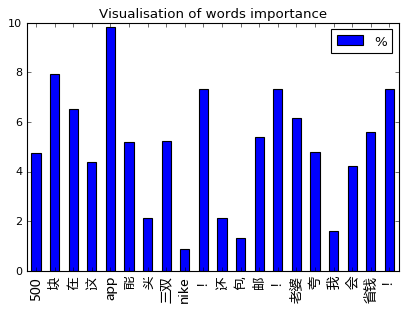

In [43]:
predict('500块在这APP能买三双NIKE！还包邮！老婆夸我会省钱！')

argmax_encode [[ 0.15375648  0.23519519  0.21125618  0.1362284   0.27928942  0.16798107
   0.0732991   0.21285412  0.38170865  0.20644897  0.07562585  0.05764214
   0.18644181  0.20644897  0.20359293  0.15647104  0.04718997  0.11954241
   0.17410111  0.20644897  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[1093, 520, 15, 14, 947, 52, 56, 11641, 8221, 6, 69, 66, 212, 6, 1601, 3111, 59, 103, 1144, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.15375648, 0.23519519, 0.21125618, 0.1362284, 0.27928942, 0.16798107, 0.073299095, 0.21285412, 0.38170865, 0.20644897, 0.075625852, 0.057642143, 0.18644181, 0.20644897, 0.20359293, 0.15647104, 0.04718997, 

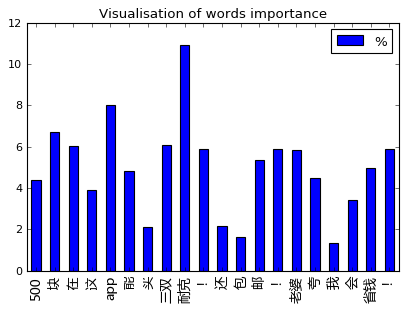

In [44]:
predict('500块在这APP能买三双耐克！还包邮！老婆夸我会省钱！')